# 목차
1. 데이터 분석 배경
1. 데이터 불러오기
1. 데이터 전처리
1. 탐색적 데이터 분석 (EDA)

# 데이터 불러오기

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
portfolio = pd.read_json('portfolio.json', lines=True)
profile = pd.read_json('profile.json', lines=True)
transcript = pd.read_json('transcript.json', lines=True)

# 데이터 Overview

## portfolio 데이터셋

In [92]:
portfolio

,reward,channels,difficulty,duration,offer_type,id
0,10,"[email, mobile, social]",10,7,bogo,ae264e3637204a6fb9bb56bc8210ddfd
1,10,"[web, email, mobile, social]",10,5,bogo,4d5c57ea9a6940dd891ad53e9dbe8da0
2,0,"[web, email, mobile]",0,4,informational,3f207df678b143eea3cee63160fa8bed
3,5,"[web, email, mobile]",5,7,bogo,9b98b8c7a33c4b65b9aebfe6a799e6d9
4,5,"[web, email]",20,10,discount,0b1e1539f2cc45b7b9fa7c272da2e1d7
5,3,"[web, email, mobile, social]",7,7,discount,2298d6c36e964ae4a3e7e9706d1fb8c2
6,2,"[web, email, mobile, social]",10,10,discount,fafdcd668e3743c1bb461111dcafc2a4
7,0,"[email, mobile, social]",0,3,informational,5a8bc65990b245e5a138643cd4eb9837
8,5,"[web, email, mobile, social]",5,5,bogo,f19421c1d4aa40978ebb69ca19b0e20d
9,2,"[web, email, mobile]",10,7,discount,2906b810c7d4411798c6938adc9daaa5


In [93]:
portfolio.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 612.0+ bytes


In [94]:
portfolio.describe()

,reward,difficulty,duration
count,10.000000,10.000000,10.000000
mean,4.200000,7.700000,6.500000
std,3.583915,5.831905,2.321398
min,0.000000,0.000000,3.000000
25%,2.000000,5.000000,5.000000
50%,4.000000,8.500000,7.000000
75%,5.000000,10.000000,7.000000
max,10.000000,20.000000,10.000000


In [95]:
portfolio['channels'].value_counts()

channels
[web, email, mobile, social]    4
[web, email, mobile]            3
[email, mobile, social]         2
[web, email]                    1
Name: count, dtype: int64

In [96]:
portfolio['offer_type'].value_counts()

offer_type
bogo             4
discount         4
informational    2
Name: count, dtype: int64

In [97]:
mapping = {'ae264e3637204a6fb9bb56bc8210ddfd': 'bogo_1',
           '4d5c57ea9a6940dd891ad53e9dbe8da0' : 'bogo_2',
           '3f207df678b143eea3cee63160fa8bed' : 'informational_1',
           '9b98b8c7a33c4b65b9aebfe6a799e6d9' : 'bogo_3',
           '0b1e1539f2cc45b7b9fa7c272da2e1d7' : 'discount_1',
           '2298d6c36e964ae4a3e7e9706d1fb8c2' : 'discount_2',
           'fafdcd668e3743c1bb461111dcafc2a4' : 'discount_3',
           '5a8bc65990b245e5a138643cd4eb9837' : 'informational_2',
           'f19421c1d4aa40978ebb69ca19b0e20d' : 'bogo_4',
           '2906b810c7d4411798c6938adc9daaa5' : 'discount_4'
           }
portfolio['id'] = portfolio['id'].map(mapping)

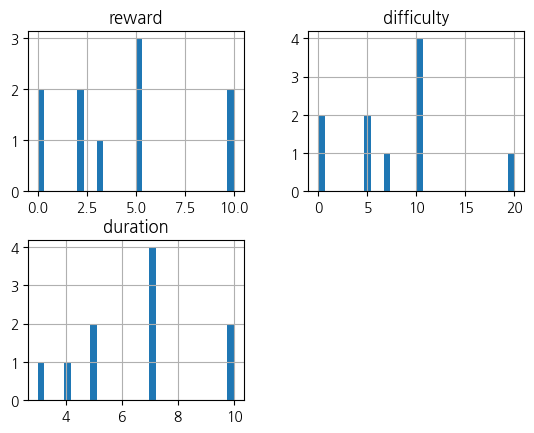

In [98]:
portfolio.hist(bins=30);

## porfile 데이터셋

In [99]:
profile.head()

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN
1,F,55,0610b486422d4921ae7d2bf64640c50b,20170715,112000.0
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN
3,F,75,78afa995795e4d85b5d9ceeca43f5fef,20170509,100000.0
4,None,118,a03223e636434f42ac4c3df47e8bac43,20170804,NaN


In [100]:
profile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               17000 non-null  int64  
 2   id                17000 non-null  object 
 3   became_member_on  17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 664.2+ KB


In [101]:
profile.describe()


,age,became_member_on,income
count,17000.000000,1.700000e+04,14825.000000
mean,62.531412,2.016703e+07,65404.991568
std,26.738580,1.167750e+04,21598.299410
min,18.000000,2.013073e+07,30000.000000
25%,45.000000,2.016053e+07,49000.000000
50%,58.000000,2.017080e+07,64000.000000
75%,73.000000,2.017123e+07,80000.000000
max,118.000000,2.018073e+07,120000.000000


In [102]:
profile['gender'].value_counts()

gender
M    8484
F    6129
O     212
Name: count, dtype: int64

In [103]:
profile['became_member_on'] = pd.to_datetime(profile['became_member_on'], format='%Y%m%d')

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'became_member_on'}>],
       [<Axes: title={'center': 'income'}>, <Axes: >]], dtype=object)

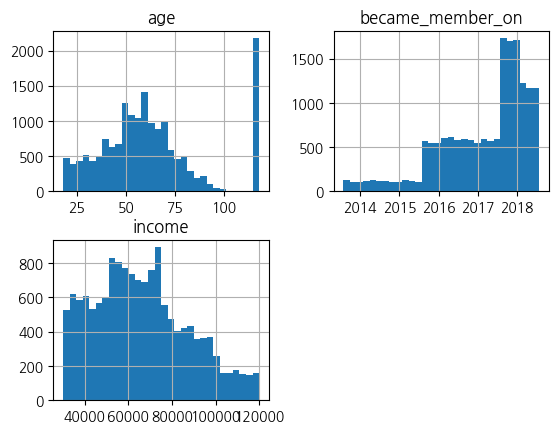

In [104]:
profile.hist(bins=30)
# age 110 이상은 이상치로 간주

In [105]:
profile[profile['age']>110]
# age 이상치가 gender, income의 결측치와 겹치는 것을 확인
# age 이상치를 제거함으로써 결측치도 함께 제거될 것으로 기대

,gender,age,id,became_member_on,income
0,None,118,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN
2,None,118,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN
4,None,118,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN
6,None,118,8ec6ce2a7e7949b1bf142def7d0e0586,2017-09-25,NaN
7,None,118,68617ca6246f4fbc85e91a2a49552598,2017-10-02,NaN
...,...,...,...,...,...
16980,None,118,5c686d09ca4d475a8f750f2ba07e0440,2016-09-01,NaN
16982,None,118,d9ca82f550ac4ee58b6299cf1e5c824a,2016-04-15,NaN
16989,None,118,ca45ee1883624304bac1e4c8a114f045,2018-03-05,NaN
16991,None,118,a9a20fa8b5504360beb4e7c8712f8306,2016-01-16,NaN


## transaction 데이터셋

In [106]:
transcript.head()

,person,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0
3,8ec6ce2a7e7949b1bf142def7d0e0586,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},0
4,68617ca6246f4fbc85e91a2a49552598,offer received,{'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'},0


In [107]:
transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [108]:
transcript.describe()

,time
count,306534.000000
mean,366.382940
std,200.326314
min,0.000000
25%,186.000000
50%,408.000000
75%,528.000000
max,714.000000


In [109]:
transcript['event'].value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

In [110]:
transcript[(~transcript['value'].astype(str).str.startswith("{'offer id")) & (~transcript['value'].astype(str).str.startswith("{'offer_id")) & (~transcript['value'].astype(str).str.startswith("{'amount"))]
# value 컬럼 시작은 {'offer id', {'offer_id', {'amount' 중 하나

,person,event,value,time


In [111]:
transcript[(transcript['value'].astype(str).str.startswith("{'amount")) & (transcript['event']!='transaction')]

,person,event,value,time


In [112]:
transcript['time'].value_counts().sort_index()

time
0      15561
6       2506
12      2215
18      2015
24      1921
       ...  
690     1260
696     1326
702     1115
708     1048
714     1130
Name: count, Length: 120, dtype: int64

In [113]:
pd.set_option('display.max_colwidth', None)
transcript.sort_values(by=['person','time']).head(20)

,person,event,value,time
55972,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},168
77705,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': '5a8bc65990b245e5a138643cd4eb9837'},192
89291,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 22.16},228
113605,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': '3f207df678b143eea3cee63160fa8bed'},336
139992,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': '3f207df678b143eea3cee63160fa8bed'},372
153401,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},408
168412,0009655768c64bdeb2e877511632db8f,transaction,{'amount': 8.57},414
168413,0009655768c64bdeb2e877511632db8f,offer completed,"{'offer_id': 'f19421c1d4aa40978ebb69ca19b0e20d', 'reward': 5}",414
187554,0009655768c64bdeb2e877511632db8f,offer viewed,{'offer id': 'f19421c1d4aa40978ebb69ca19b0e20d'},456
204340,0009655768c64bdeb2e877511632db8f,offer received,{'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'},504


In [114]:
value_df = pd.json_normalize(transcript['value'])
if 'offer id' in value_df.columns and 'offer_id' in value_df.columns:
    value_df['offer_id'] = value_df['offer_id'].fillna(value_df['offer id'])
transcript = pd.concat([transcript.reset_index(drop=True), value_df], axis=1)
transcript = transcript.drop(columns=['value', 'offer id'], errors='ignore')

In [115]:
mapping = {'ae264e3637204a6fb9bb56bc8210ddfd': 'bogo_1',
           '4d5c57ea9a6940dd891ad53e9dbe8da0' : 'bogo_2',
           '3f207df678b143eea3cee63160fa8bed' : 'informational_1',
           '9b98b8c7a33c4b65b9aebfe6a799e6d9' : 'bogo_3',
           '0b1e1539f2cc45b7b9fa7c272da2e1d7' : 'discount_1',
           '2298d6c36e964ae4a3e7e9706d1fb8c2' : 'discount_2',
           'fafdcd668e3743c1bb461111dcafc2a4' : 'discount_3',
           '5a8bc65990b245e5a138643cd4eb9837' : 'informational_2',
           'f19421c1d4aa40978ebb69ca19b0e20d' : 'bogo_4',
           '2906b810c7d4411798c6938adc9daaa5' : 'discount_4'
           }
transcript['offer_id'] = transcript['offer_id'].map(mapping)

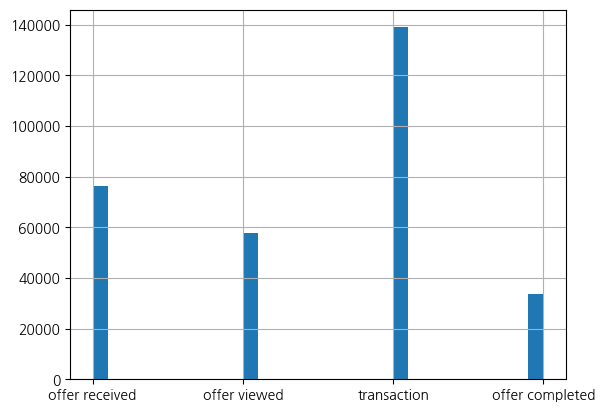

In [116]:
transcript['event'].hist(bins=30);

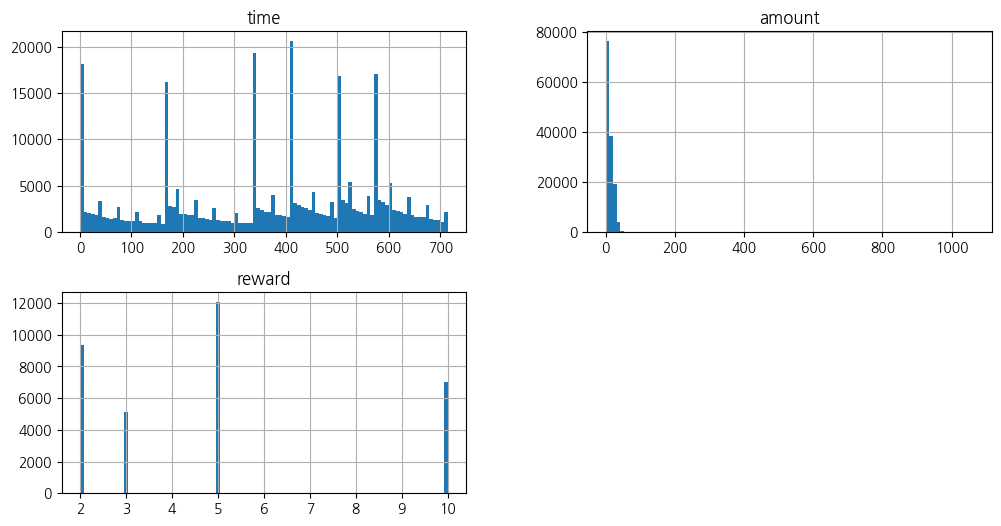

In [117]:
transcript.hist(bins=100, figsize=(12,6));

## 요약

|컬럼명|설명|타입|
|--|--|--|
|reward|고객이 쿠폰을 사용했을 때 받는 보상 금액|int|
|channels|쿠폰이 전달되는 방식(이메일, 모바일, 소셜)|string|
|difficulty|쿠폰을 사용하기 위해 충족해야 하는 최소 구매 금액|int|
|duration|쿠폰이 유효한 기간(일)|int|
|offer_type|쿠폰의 유형(할인, 구매 후 무료 아이템 등)|string|
|offer_id|쿠폰의 고유 식별자|string|

+ 총 10개의 쿠폰 종류가 있다.
+ channels: 이메일, 모바일, 소셜 미디어, 웹
+ offer_type: 할인, 1+1, 정보용(reward, difficulty 0)
+ reward는 0~10 사이의 값으로 분포되어 있음
+ difficulty는 0~20 사이의 값으로 분포되어 있음
+ duration은 3~10 사이의 값으로 분포되어 있음


|컬럼명|설명|타입|
|--|--|--|
|gender|고객의 성별|string|
|age|고객의 나이|int|
|id|고객의 고유 식별자|string|
|became_member_on|고객이 멤버십에 가입한 날짜|int|
|income|고객의 연간 소득|int|

+ 17000개의 고객 데이터
+ gender M, F, O, None 4가지 성별로 구성
+ age 이상치 발견
+ became_member_on은 int형으로 되어 있음 -> datetime형으로 변환 필요
+ inocme 단위가 너무 큼
+ gender, income 결측치 존재

|컬럼명|설명|타입|
|--|--|--|
|persion|고객의 고유 식별자|string|
|event|고객이 수행한 이벤트 유형(쿠폰 발송, 확인, 완료, 거래)|string|
|value|offer_id, reward, amount로 구성|string|
|time|테스트 시작 이후 경과된 시간 (hour)|int|

+ 총 306534개의 transaction 데이터
+ event: offer received, offer viewed, offer completed, transaction 4가지 이벤트로 구성
+ value: {'offer id', {'offer_id', {'amount' 중 하나로 시작 / amount로 시작하는 건 transaction 이벤트에 해당
+ time: 0~714 사이의 값으로 분포되어 있음 / 최대 30일 동안 진행되었으며, 퍼널 분석이 가능해 보임

### 세그먼트 분석
+ 쿠폰
    + 쿠폰 사용자 vs 비사용자
    + 쿠폰 유형별 사용자 분석
    + 쿠폰 사용자 행동 분석 (조회, 완료 등) 퍼널 분석?
+ 고객 특성
    + 고객 특성별 분석 (성별, 나이, 소득 등)
    + 가입 시기별 분석
+ 시간
    + 시험 기간별 분석
    + 쿠폰 사용기간 분석

### 유의 사항
1. 우연한 사용이 발생했는지. (쿠폰 확인 -> 거래 -> 쿠폰 완료 가 아닌 경우) 
2. value 형식에서 id형식만 추출
    - 새로운 컬럼을 통해 어떤 형식인지 기록

# 데이터 전처리

## 이상치 처리

In [118]:
profile.drop(profile[profile['age']>110].index, inplace=True)

## 결측치 처리

In [119]:
profile.isna().sum()

gender              0
age                 0
id                  0
became_member_on    0
income              0
dtype: int64

## 데이터 merge

In [120]:
transcript = transcript.rename(columns={'person': 'id'})
portfolio = portfolio.rename(columns={'id': 'offer_id'})

df = profile.merge(transcript, left_on='id', right_on='id', how='left')
df = df.merge(portfolio, left_on='offer_id', right_on='offer_id', how='left').drop('reward_y', axis=1).rename(columns={'reward_x':'reward'})

In [126]:
df.sort_values(by=['id','time']).head(60)
# 같은 id 내에서 같은 offer_id가 발생하는 경우 있음
# information의 경우 조건을 만족해도 completed가 발생하지 않음
# 한 번에 거래에서 두 개의 쿠폰을 사용하는 경우도 존재
# 한 번에 두 개의 쿠폰을 사용할 때 dificulty가 큰 거 하나만 충족하면 됨. ex) difficulty 10, 5 인 경우 10만 충족해도 5도 충족된 것으로 간주
# informational의 영향으로 샀는데 다른 쿠폰이 사용되는 경우도 있음
# informational 한 번으로 여러 번의 transaction이 발생하는 경우도 존재하나?

,gender,age,id,became_member_on,income,event,time,amount,offer_id,reward,channels,difficulty,duration,offer_type,due time,influenced_flag
60071,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,offer received,168,NaN,informational_2,NaN,"[email, mobile, social]",0.0,3.0,informational,240.0,1.0
60072,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,offer viewed,192,NaN,informational_2,NaN,"[email, mobile, social]",0.0,3.0,informational,NaN,NaN
60073,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,transaction,228,22.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60074,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,offer received,336,NaN,informational_1,NaN,"[web, email, mobile]",0.0,4.0,informational,432.0,1.0
60075,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,offer viewed,372,NaN,informational_1,NaN,"[web, email, mobile]",0.0,4.0,informational,NaN,NaN
60076,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,offer received,408,NaN,bogo_4,NaN,"[web, email, mobile, social]",5.0,5.0,bogo,528.0,1.0
60077,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,transaction,414,8.57,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
60078,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,offer completed,414,NaN,bogo_4,5.0,"[web, email, mobile, social]",5.0,5.0,bogo,NaN,NaN
60079,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,offer viewed,456,NaN,bogo_4,NaN,"[web, email, mobile, social]",5.0,5.0,bogo,NaN,NaN
60080,M,33,0009655768c64bdeb2e877511632db8f,2017-04-21,72000.0,offer received,504,NaN,discount_3,NaN,"[web, email, mobile, social]",10.0,10.0,discount,744.0,1.0


In [122]:
# TODO : transaction을 completed 개수만큼 채우는 걸 할지 말지
# # transaction 안에 offer_id를 채워야 퍼널 분석이 가능할 것으로 보임
# # 두 개의 offer_id를 동시에 사용하는 경우는 어떻게 처리할지 고민 필요
# # left join을 사용해서 transaction에만 offer_id를 채우는 방법을 시도해볼 수 있을 듯
# offer_completed = df[(df['event']=='offer completed')][['id','event','time','offer_id']]
# offer_completed["event"] = offer_completed["event"].replace("offer completed", "transaction")

# dfdf = pd.merge(df, offer_completed, on=['id','event','time'], how='left', suffixes=('', '_new'))
# dfdf['offer_id'] = dfdf['offer_id'].fillna(dfdf['offer_id_new'])
# dfdf.drop('offer_id_new', axis=1, inplace=True)

## 피쳐 엔지니어링

In [123]:
# offer received 이벤트에 대해 due time 컬럼 생성
df['due time'] = np.where(
    df['event'] == 'offer received', 
    df['time'] + (df['duration'] * 24), 
    np.nan
)

In [ ]:
df2["received_bogo"] = ((df2["event"] == "offer received") & (df2["offer_type"] == "bogo")).astype(int)
df2["received_discount"] = ((df2["event"] == "offer received") & (df2["offer_type"] == "discount")).astype(int)
df2["received_info"] = ((df2["event"] == "offer received") & (df2["offer_type"] == "informational")).astype(int)

In [ ]:
# # due time 내에 offer reveiwed가 발생했는지 여부 확인
# # offer viewed time만 따로 추출
# reviewed = df[df["event"] == "offer viewed"][["id", 'offer_id', "time"]].copy()

# # id, offer_id별 offer viewed time 리스트로 저장
# reviewed_dict = reviewed.groupby(["id", "offer_id"])["time"].apply(list).to_dict()

# # offer received 행만 대상으로 window 내 리뷰 존재 여부 계산
# def check_review_in_window(row):
#     received_times = reviewed_dict.get((row["id"], row["offer_id"]), [])
#     return int(any((t >= row["time"]) and (t <= row["due time"]) for t in received_times))
# df.loc[df["event"] == "offer received", "reviewed_flag"] = df.loc[df["event"] == "offer received"].apply(check_review_in_window, axis=1)
# # offer received가 아닌 행은 NaN 처리
# df.loc[df["event"] != "offer received", "reviewed_flag"] = np.nan



# due time 내에 transaction이 발생했는지 여부 확인
# transaction time만 따로 추출
tx = df[df["event"] == "transaction"][["id", "time"]].copy()

# id별 transaction time 리스트로 저장
tx_dict = tx.groupby("id")["time"].apply(list).to_dict()

# offer received 행만 대상으로 window 내 거래 존재 여부 계산
mask_recv = df["event"] == "offer received"

def check_tx_in_window(row):
    dict_times = tx_dict.get(row["id"], [])
    return int(any((t >= row["time"]) and (t <= row["due time"]) for t in dict_times))

df.loc[mask_recv, "influenced_flag"] = df.loc[mask_recv].apply(check_tx_in_window, axis=1)

# offer received가 아닌 행은 NaN 처리
df.loc[~mask_recv, "influenced_flag"] = np.nan

# EDA

In [127]:
cnt = transcript.groupby('id').agg(
    completed_cnt = ('event', lambda x: (x=='offer completed').sum())
)

print(f' 쿠폰 미사용자 :{cnt[cnt['completed_cnt'] == 0].shape[0]}')
print(f' 쿠폰 사용자 :{cnt[cnt['completed_cnt'] >= 1].shape[0]}')

 쿠폰 미사용자 :4226
 쿠폰 사용자 :12774


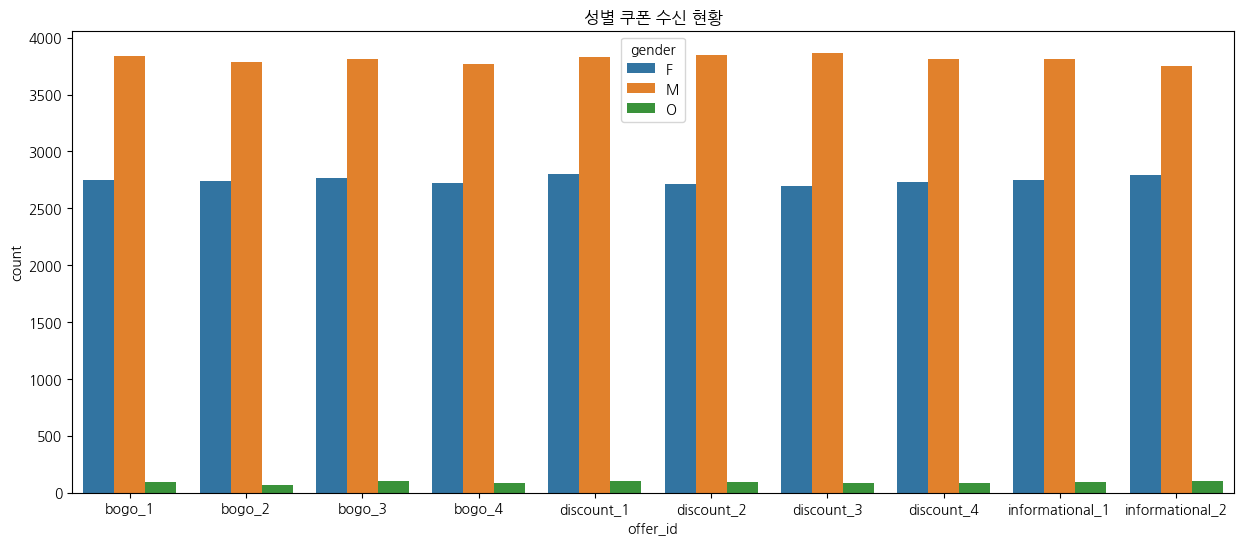

In [137]:
offer_completed_cnt = df[df['event']=='offer received'].groupby(['offer_id', 'gender']).size().reset_index(name='count')
plt.figure(figsize=(15,6))
sns.barplot(x='offer_id', y='count', hue='gender', data=offer_completed_cnt)
plt.title('성별 쿠폰 수신 현황')
plt.show()

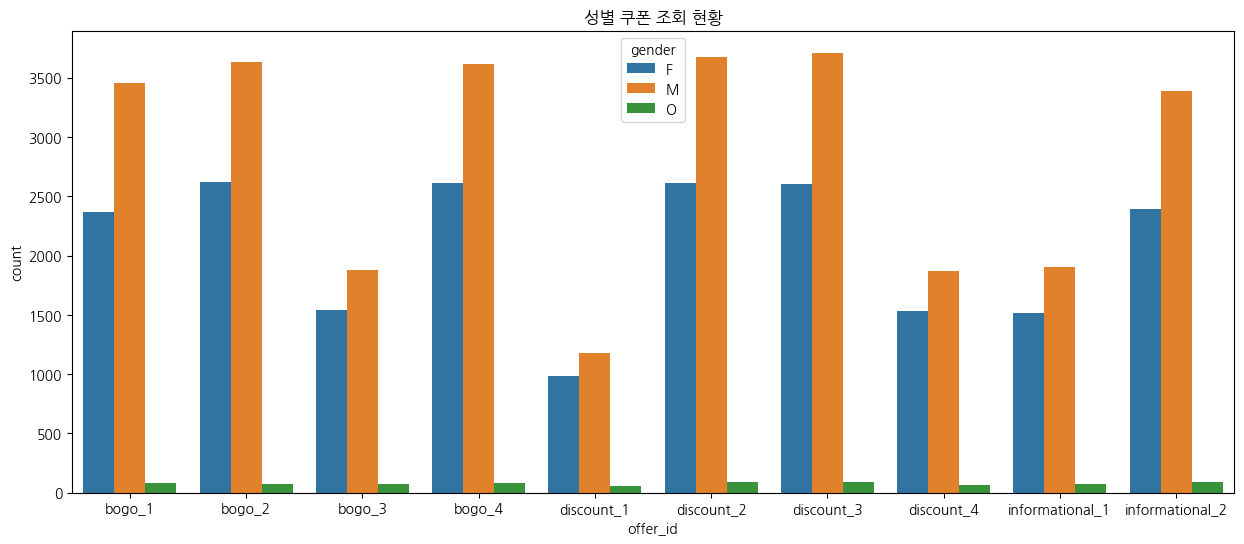

In [138]:
offer_completed_cnt = df[df['event']=='offer viewed'].groupby(['offer_id', 'gender']).size().reset_index(name='count')
plt.figure(figsize=(15,6))
sns.barplot(x='offer_id', y='count', hue='gender', data=offer_completed_cnt)
plt.title('성별 쿠폰 조회 현황')
plt.show()

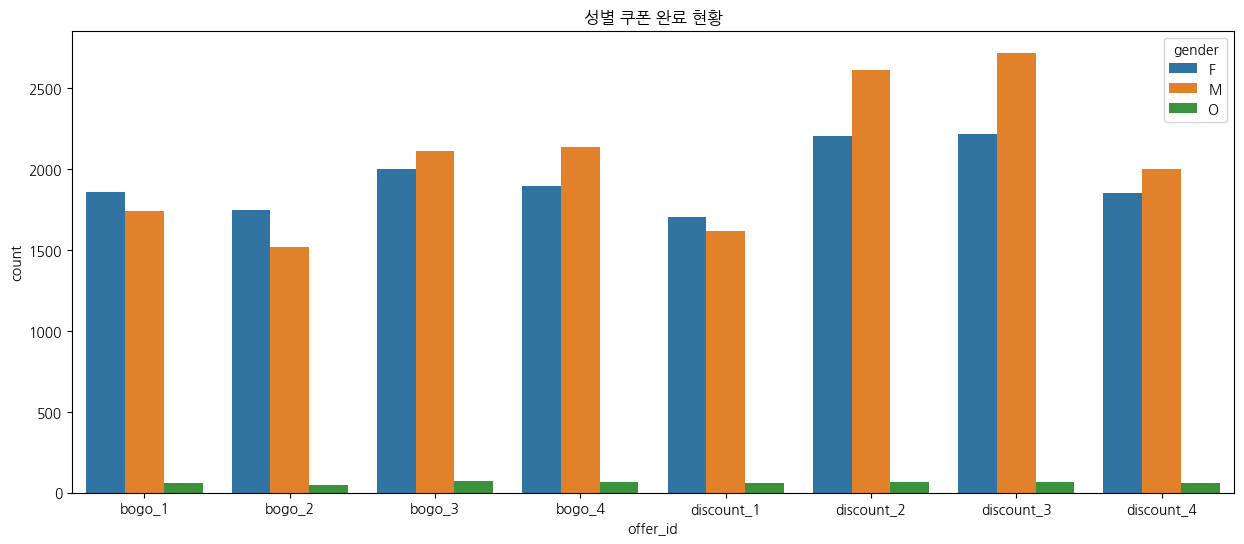

In [147]:
offer_completed_cnt = df[df['event']=='offer completed'].groupby(['offer_id', 'gender']).size().reset_index(name='count')
plt.figure(figsize=(15,6))
sns.barplot(x='offer_id', y='count', hue='gender', data=offer_completed_cnt)
plt.title('성별 쿠폰 완료 현황')
plt.show()

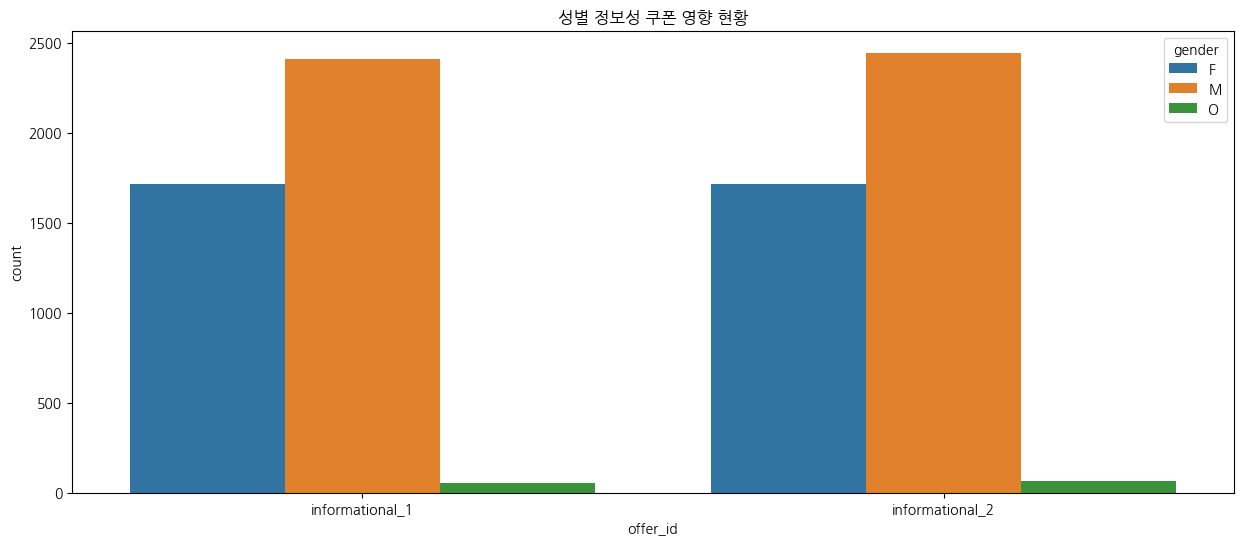

,offer_id,gender,count
0,informational_1,F,1718
1,informational_1,M,2409
2,informational_1,O,56
3,informational_2,F,1714
4,informational_2,M,2445
5,informational_2,O,65


In [139]:
informational_completed = df[(df['offer_type'] == 'informational') & (df['influenced_flag'] == 1)].groupby(['offer_id','gender']).size().reset_index(name='count')
plt.figure(figsize=(15,6))
sns.barplot(x='offer_id', y='count', hue='gender', data=informational_completed)
plt.title('성별 정보성 쿠폰 영향 현황')
plt.show()

informational_completed

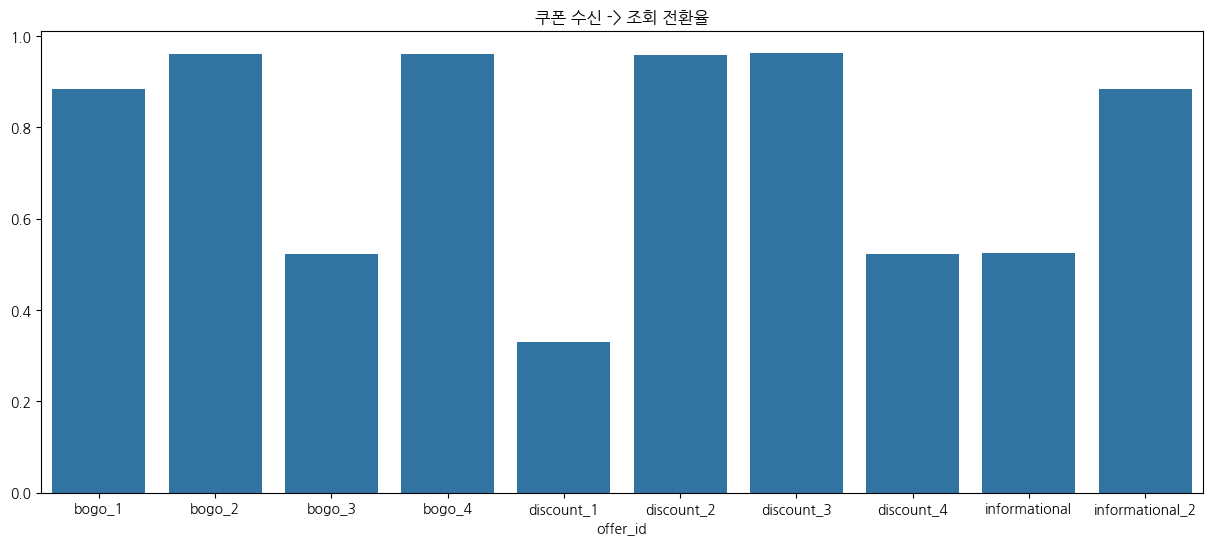

In [148]:
# recieved -> viewed 전환율 분석 필요

veiw_rate = df[df['event']=='offer viewed'].groupby('offer_id').size() / df[df['event']=='offer received'].groupby('offer_id').size()
plt.figure(figsize=(15,6))
sns.barplot(x=veiw_rate.index, y=veiw_rate.values)
plt.title('쿠폰 수신 -> 조회 전환율')
plt.show()

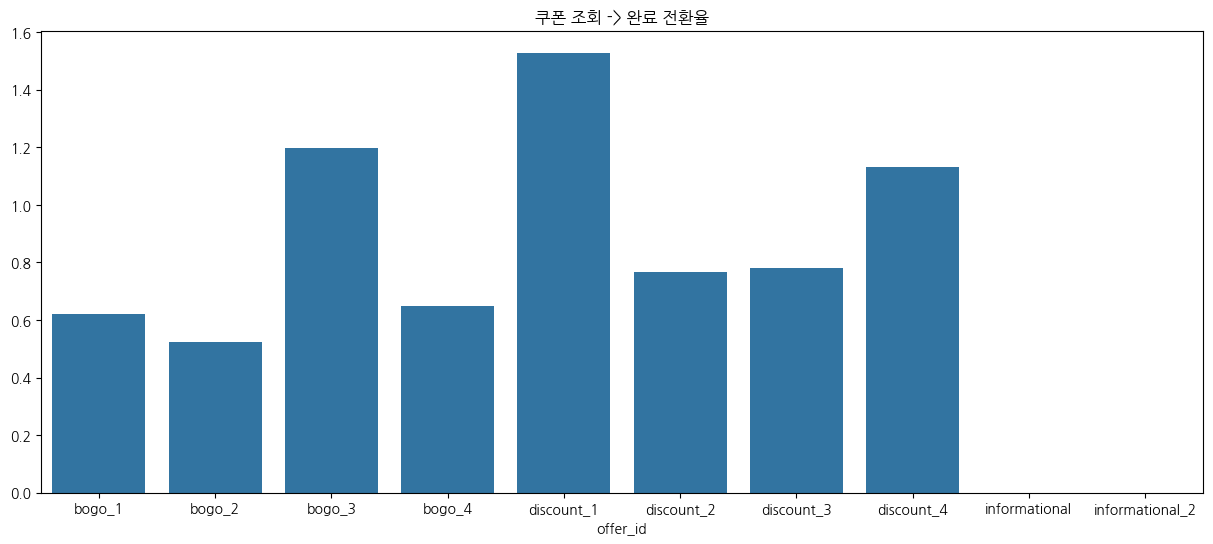

In [149]:
# veiwed -> completed 전환율 분석 필요

complete_rate = df[df['event']=='offer completed'].groupby('offer_id').size() / df[df['event']=='offer viewed'].groupby('offer_id').size()
plt.figure(figsize=(15,6))
sns.barplot(x=complete_rate.index, y=complete_rate.values)
plt.title('쿠폰 조회 -> 완료 전환율')
plt.show()

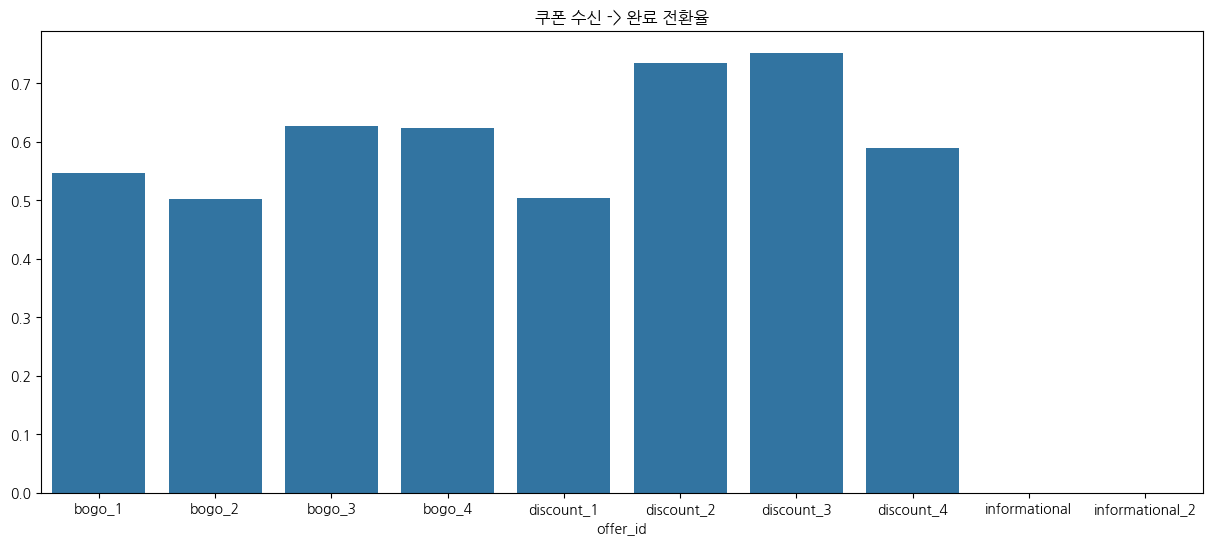

In [ ]:
# recieved -> completed 전환율 분석 필요
complete_rate = df[df['event']=='offer completed'].groupby('offer_id').size() / df[df['event']=='offer received'].groupby('offer_id').size()
plt.figure(figsize=(15,6))
sns.barplot(x=complete_rate.index, y=complete_rate.values)
plt.title('쿠폰 수신 -> 완료 전환율')
plt.show()

# K-means 클러스터링
+ 결국 누가 쿠폰에 반응을 했고
+ 그 조건으로 머신러닝을 돌리면, 비슷한 조건의 고객은 구매를 하지 않을까

In [141]:

cnt = df.groupby(['id','gender','age','income','became_member_on']).agg(
    received_cnt = ('event', lambda x: (x=='offer received').sum()),
    viewed_cnt = ('event', lambda x: (x=='offer viewed').sum()),
    transaction_cnt = ('event', lambda x: (x=='transaction').sum()),
    completed_cnt = ('event', lambda x: (x=='offer completed').sum())
)

In [143]:
cnt

,,,,,received_cnt,viewed_cnt,transaction_cnt,completed_cnt
id,gender,age,income,became_member_on,,,,
0009655768c64bdeb2e877511632db8f,M,33,72000.0,2017-04-21,5,4,8,3
0011e0d4e6b944f998e987f904e8c1e5,O,40,57000.0,2018-01-09,5,5,5,3
0020c2b971eb4e9188eac86d93036a77,F,59,90000.0,2016-03-04,5,3,8,3
0020ccbbb6d84e358d3414a3ff76cffd,F,24,60000.0,2016-11-11,4,4,12,3
003d66b6608740288d6cc97a6903f4f0,F,26,73000.0,2017-06-21,5,4,18,3
...,...,...,...,...,...,...,...,...
fff3ba4757bd42088c044ca26d73817a,F,69,83000.0,2015-09-20,6,3,11,3
fff7576017104bcc8677a8d63322b5e1,M,71,73000.0,2017-10-31,5,4,6,3
fff8957ea8b240a6b5e634b6ee8eafcf,M,71,56000.0,2018-02-18,3,2,5,0


그룹군 안에서 

In [ ]:
dfdfdf = df.copy().groupby(['id','offer_id']).agg(
    received_count = ('event', lambda x: (x=='offer received').sum()),
    completed_flag = ('event', lambda x: 1 if 'offer completed' in x.values else 0),
    influenced_flag = ('influenced_flag', 'max')
)
